In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task1-spills.ipynb")

In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task2-spills.ipynb")

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/MEDS-eds-220/eds220-hwk3


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 

## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your commit history if you try to push them.

## 2. Datasets description
- Read the metadata for both datsets and write a brief description about each one. Indicate the date sources and date of access.

1. The NYSDEC Spill Incidents dataset contains records of spills of petroleum and other hazardous materials in New York State which, under state law and regulations, must be reported by the spiller and/or anyone who has knowledge of the incident. The data include information such as region and unique spill identifiers, facility names/locations, spills dates and times, material spilled and quantity spilled and recovered etc..
**Data Source:** New York State Department of Environmental Conservation (NYSDEC), Open Data NY portal (data.ny.gov)
**Date of Access:** November 2, 2025

2. The TIGER/Line Shapefiles are extracts of selected geographic and cartographic information from the Census Bureau and include polygon boundaries of geographic areas and features, linear features (roads/hydrography), and point features from all 50 states as well as the District of Columbia, Puerto Rico, and the Island Areas.

**Data Source:** U.S. Census Bureau, Geography Division
**Date of Access:** November 2, 2025
**Technical Documentation:** TIGER/Line® Shapefiles 2023 Technical Documentation, issued October 2023


## 3. Import libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [3]:
# Use pandas to read in the NYSDEC Spill Incidents dataset
fp = os.path.join('data','Spill_Incidents_20251102.csv')
spills = pd.read_csv(fp) 

# Use geopandas to read in the TIGER/Line Shapefiles for New York State counties
fp = os.path.join('data','tl_2023_us_county.zip')
counties = gpd.read_file(fp)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


<!-- BEGIN QUESTION -->

## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head

b. Check the data types of the columns

c. Check the unique values in the `material_family` column

d. Check the unique values in the `county` column

e. Insert a markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells for preliminary data exploration.

In [4]:
#a. Check the dataframe's head
spills.head(10)

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10,Gallons,0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,NaN,0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,Pounds,0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1,Gallons,0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6,Gallons,6
5,311484,PRIVATE RESIDENCE,6568 GLEN HAVEN RD,NaN,SCOTT,Cortland,NaN,1238,7,01/11/2004,01/11/2004,Equipment Failure,NaN,Private Dwelling,08/25/2004,#2 fuel oil,Petroleum,75,Gallons,0
6,104307,149TH RD,"183RD ST, 149TH AV& 149RD",NaN,QUEENS,Queens,NaN,4101,2,07/23/2001,07/23/2001,Abandoned Drums,NaN,Unknown,08/01/2001,unknown material,Other,0,Gallons,0
7,160046,ABANDONED DRUMS,BAKER SCHOOL HOUSE ROAD,NaN,SOLON,Cortland,NaN,1200,7,11/23/2001,11/23/2001,Abandoned Drums,NaN,Unknown,05/14/2002,unknown material,Other,0,Gallons,0
8,9606869,AMSTERDAM AVE,WEST 79 TH STREET,NaN,NYC,New York,NaN,3101,2,08/28/1996,08/28/1996,Traffic Accident,NaN,Commercial Vehicle,08/29/1996,antifreeze,Other,2,Gallons,2
9,312198,APARTMENT BUILDING,4 SOUTH SIDE TERRACE APAR,NaN,NEW PALTZ,Ulster,NaN,5638,3,02/02/2004,02/02/2004,Tank Failure,NaN,Commercial/Industrial,04/05/2004,#2 fuel oil,Petroleum,0,Pounds,0


In [5]:
#b. Check the data types of the columns
spills.dtypes

Spill Number              int64
Program Facility Name    object
Street 1                 object
Street 2                 object
Locality                 object
County                   object
ZIP Code                 object
SWIS Code                 int64
DEC Region                int64
Spill Date               object
Received Date            object
Contributing Factor      object
Waterbody                object
Source                   object
Close Date               object
Material Name            object
Material Family          object
Quantity                 object
Units                    object
Recovered                object
dtype: object

In [6]:
#c. Check the unique values in the `material_family` column
spills['Material Family'].unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [7]:
#d. Check the unique values in the `county` column
spills['County'].unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'Schuyler', 'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex',
       'Chenango', 'Erie', 'Livingston', 'Oneida', 'Wayne', 'Suffolk',
       'Orleans', 'Ontario', 'Genesee', 'Otsego', 'Tompkins', 'Madison',
       'Chemung', 'Seneca', 'Broome', 'Hamilton', 'Washington', 'Steuben',
       'Rensselaer', 'Franklin', 'Columbia', 'Fulton', 'Herkimer',
       'Schoharie', 'Montgomery', 'Putnam', 'Delaware',
       'New Jersey - Region 2', 'Tioga', 'Chautauqua', 'Cattaraugus',
       'Wyoming', 'Yates', 'Greene', 'Pennsylvania - Region 9',
       'Allegany', 'New Jersey - Region 3 (N)',
       'Cattaraugus Indian Reservation', 'New Jersey - Region 3 (T)',
       'Canada - Region 6', 'Canada - Region 9',
       '

e. Looking at the head of the data, one of the things I noticed is that there are a number of missing Unit column values. I also noted that often when the source is unknown, the material is as well. Looking at the datatypes, I noticed that the date columns are stored as object types, not datetime, and that the quantity and recovered values are stored as objects rather than integers. Looking at the unique values in Material Family it seems like unknown materials would be categorized as 'Other'. Finally, looking at the unique values in in the County column, I noticed that there are a number of values that are from outside of New York state (e.g. Massachusetts, Canada, Pennsylvania, etc.) as well as tribal lands.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.B. Cleaning
a. Simplify column names as needed.

In [8]:
# Convert column names to lower snake case
spills.columns = spills.columns.str.lower().str.replace(' ', '_')
spills.columns

Index(['spill_number', 'program_facility_name', 'street_1', 'street_2',
       'locality', 'county', 'zip_code', 'swis_code', 'dec_region',
       'spill_date', 'received_date', 'contributing_factor', 'waterbody',
       'source', 'close_date', 'material_name', 'material_family', 'quantity',
       'units', 'recovered'],
      dtype='object')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Update column data types as needed *for this analysis*.

In [9]:
# Convert date columns to datetime type
spills[['spill_date', 'received_date', 'close_date']] = spills[['spill_date', 'received_date', 'close_date']].apply(pd.to_datetime, format='%m/%d/%Y')
spills.dtypes

spill_number                      int64
program_facility_name            object
street_1                         object
street_2                         object
locality                         object
county                           object
zip_code                         object
swis_code                         int64
dec_region                        int64
spill_date               datetime64[ns]
received_date            datetime64[ns]
contributing_factor              object
waterbody                        object
source                           object
close_date               datetime64[ns]
material_name                    object
material_family                  object
quantity                         object
units                            object
recovered                        object
dtype: object

In [10]:
# Inspect 'quantity' and 'recovered' columns
print(spills['quantity'].value_counts().tail(10))

quantity
2,660     1
742       1
2,113     1
10,520    1
511       1
1,135     1
3,831     1
1,046     1
616       1
1,126     1
Name: count, dtype: int64


In [11]:
# Get rid of the commas in the counts and convert to int type
spills['quantity_int'] = spills['quantity'].str.replace(',', '').apply(pd.to_numeric)
spills['recovered_int'] = spills['recovered'].str.replace(',', '').apply(pd.to_numeric)

# Convert columns to int type
spills.dtypes
spills.spill_date

0        2001-10-10
1        2004-08-21
2        2004-08-21
3        2002-08-02
4        2003-01-20
            ...    
563534   2004-04-27
563535   1999-07-06
563536   1993-03-02
563537   1990-01-05
563538   2001-06-13
Name: spill_date, Length: 563539, dtype: datetime64[ns]

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [12]:
# Select data about petroleu spills that took place between January 1st 2023, and October 31st (including both dates), 2023
petr_23 = spills[(spills['material_family'] == 'Petroleum') & (spills['spill_date'].between('2023-01-01', '2023-10-31'))]

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print a message verifying that `petr_23` only has data for 2023 and from January through October.
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`.

In [13]:
# Extract the unique years from the filtered df
unique_years = petr_23.spill_date.dt.year.unique()

# Extract the unique months from the filtered df
unique_months = sorted(petr_23.spill_date.dt.month.unique())

# Get the month names by using the sorted month numbers
month_names = [petr_23[petr_23.spill_date.dt.month == m].spill_date.dt.month_name().iloc[0] 
               for m in unique_months]

# Use f-string to print verifying message
print(f'The unique year values in petr_23 are {petr_23.spill_date.dt.year.unique()} and the unique months are {month_names}')


The unique year values in petr_23 are [2023] and the unique months are ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October']


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [14]:
# Assert dataframe is not empty
assert (len(petr_23) > 0), "petr_23 is empty"

# Assert there is only one unique value
assert (petr_23['material_family'].nunique() == 1), "Muliple material families found" 

# Assert that value is petroleum
assert (petr_23['material_family'] == 'Petroleum').all(), "Data contains non-petroleum spills"

<!-- END QUESTION -->

### 5.D. Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Two columns only.
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.

In [15]:
# Create dataframe with two columns, one for count of spills per county, and one for county names
spills_per_county = petr_23.groupby('county').size().reset_index(name='n_spills')

In [16]:
# Inspect test csv
test_spills_per_county = pd.read_csv('data/q5d_df.csv')
test_spills_per_county

,Unnamed: 0,county,n_spills
0,0,Albany,205
1,1,Allegany,30
2,2,Bronx,143
3,3,Broome,75
4,4,Cattaraugus,47
...,...,...,...
59,59,Washington,96
60,60,Wayne,38
61,61,Westchester,743
62,62,Wyoming,24


In [17]:
def compare_dataframes(test_df, your_df):
    
    # Comparison of two dataframes
    print(f"COMPARISON: Test CSV vs My DF")
    
    print(f"\n1. TOTAL SPILLS:")
    print(f"   Test CSV: {test_df['n_spills'].sum()}")
    print(f"   My D: {your_df['n_spills'].sum()}")
    print(f"   Difference: {your_df['n_spills'].sum() - test_df['n_spills'].sum()}")
    
    # Detailed comparison
    merged = test_df.merge(your_df, on='county', how='outer', 
                          suffixes=('_test', '_yours'), indicator=True)
    merged['diff'] = merged['n_spills_yours'].fillna(0) - merged['n_spills_test'].fillna(0)
    
    discrepancies = merged[merged['diff'] != 0]
    
    print(f"\n3. DISCREPANCIES ({len(discrepancies)} counties with differences):")
    print(discrepancies[['county', 'n_spills_test', 'n_spills_yours', 'diff']].to_string())
    
    print(f'\nSum of our diff column is the "Difference" value from (1): {discrepancies["diff"].sum()}')
    return merged

# Use it
comparison_results = compare_dataframes(test_spills_per_county, spills_per_county)

COMPARISON: Test CSV vs My DF

1. TOTAL SPILLS:
   Test CSV: 7220
   My D: 7228
   Difference: 8

3. DISCREPANCIES (11 counties with differences):
         county  n_spills_test  n_spills_yours  diff
0        Albany            205             206     1
13     Dutchess            158             159     1
16     Franklin             44              46     2
17       Fulton             33              32    -1
31     New York            174             175     1
33       Oneida            108             109     1
42   Rensselaer            106             105    -1
45     Saratoga            161             162     1
46  Schenectady             77              78     1
57       Ulster            161             162     1
61  Westchester            743             744     1

Sum of our diff column is the "Difference" value from (1): 8


In [18]:
grader.check("q5d")

q5d results:
    q5d - 1 result:
        ❌ Test case failed
        Trying:
            def test_q3(student_data):
                try:
                    expected_data = pd.read_csv('data/q5d_df.csv').drop(columns='Unnamed: 0')
                    pd.testing.assert_frame_equal(expected_data, student_data)
                except AssertionError:
                    raise AssertionError('Incorrect answer.')
        Expecting nothing
        ok
        Trying:
            test_q3(spills_per_county)
        Expecting nothing
        **********************************************************************
        Line 7, in q5d 0
        Failed example:
            test_q3(spills_per_county)
        Exception raised:
            Traceback (most recent call last):
              File "<doctest q5d 0[0]>", line 4, in test_q3
                pd.testing.assert_frame_equal(expected_data, student_data)
              File "/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/pandas/_testing/asserters.py", line 1279, in assert_frame_equal
                assert_series_equal(
              File "/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/pandas/_testing/asserters.py", line 997, in assert_series_equal
                assert_numpy_array_equal(
              File "/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/pandas/_testing/asserters.py", line 690, in assert_numpy_array_equal
                _raise(left, right, err_msg)
              File "/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/pandas/_testing/asserters.py", line 684, in _raise
                raise_assert_detail(obj, msg, left, right, index_values=index_values)
              File "/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/pandas/_testing/asserters.py", line 614, in raise_assert_detail
                raise AssertionError(msg)
            AssertionError: DataFrame.iloc[:, 1] (column name="n_spills") are different

            DataFrame.iloc[:, 1] (column name="n_spills") values are different (17.1875 %)
            [index]: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]
            [left]:  [205, 30, 143, 75, 47, 27, 55, 31, 38, 57, 60, 35, 41, 158, 283, 57, 44, 33, 51, 39, 11, 58, 108, 178, 42, 59, 42, 257, 62, 576, 6, 174, 88, 108, 198, 67, 336, 16, 68, 34, 117, 321, 106, 52, 161, 161, 77, 33, 11, 25, 65, 72, 723, 85, 28, 36, 1, 161, 81, 96, 38, 743, 24, 6]
            [right]: [206, 30, 143, 75, 47, 27, 55, 31, 38, 57, 60, 35, 41, 159, 283, 57, 46, 32, 51, 39, 11, 58, 108, 178, 42, 59, 42, 257, 62, 576, 6, 175, 88, 109, 198, 67, 336, 16, 68, 34, 117, 321, 105, 52, 161, 162, 78, 33, 11, 25, 65, 72, 723, 85, 28, 36, 1, 162, 81, 96, 38, 744, 24, 6]

            During handling of the above exception, another exception occurred:

            Traceback (most recent call last):
              File "/opt/anaconda3/envs/eds220-env/lib/python3.11/doctest.py", line 1351, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q5d 0[1]>", line 1, in <module>
                test_q3(spills_per_county)
              File "<doctest q5d 0[0]>", line 6, in test_q3
                raise AssertionError('Incorrect answer.')
            AssertionError: Incorrect answer.

<!-- BEGIN QUESTION -->

## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head

b. Check the data types of the columns

c. Check the geo-dataframe's CRS

d. Plot the geo-dataframe

e. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells of preliminary data exploration.

The dataset includes 19 columns with a mix of identifying information, geographic codes, administrative classifications, area measurements, and spatial geometry data. The first thing I noticed is that many of the columns containing numeric values are stored as objects (strings) (e.g. STATEFP, COUNTYFP, COUNTYNS, GEOID, LSAD, ALAND, and AWATER). Displaying the CRS showed me that we are working with an unprojected (2d) coordinate system specificly for North America.

In [28]:
# a
# Display the gdf head
counties.head()

,statefp,countyfp,countyns,geoid,geoidfq,name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,0500000US31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169269688,22850324,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,0500000US31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [29]:
# b
# Display gdf data types
counties.dtypes

statefp       object
countyfp      object
countyns      object
geoid         object
geoidfq       object
name          object
namelsad      object
lsad          object
classfp       object
mtfcc         object
csafp         object
cbsafp        object
metdivfp      object
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

In [30]:
# c
# Display gdf crs
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

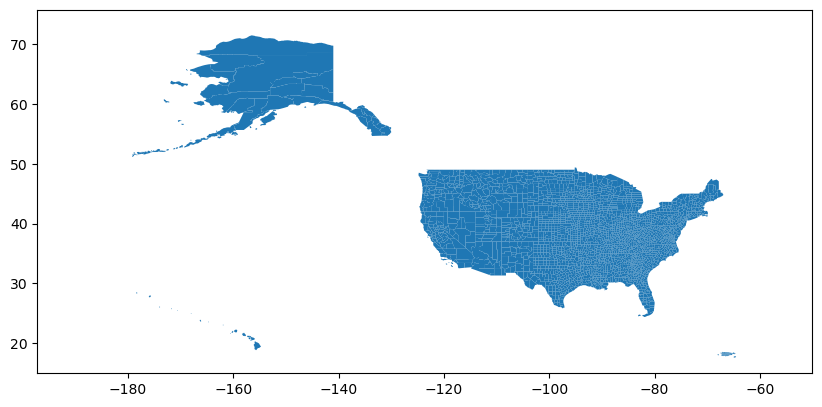

In [31]:
# d
# Plot the gdf polygons
fig, ax = plt.subplots(figsize = (10, 10))
counties.plot(ax = ax)
ax.set_xlim(xmax = -50)
ax.set_ylim(ymin = 15)

plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [32]:
# Convert column names to lower case
counties.columns = counties.columns.str.lower()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them (you may need to look at the metadata).

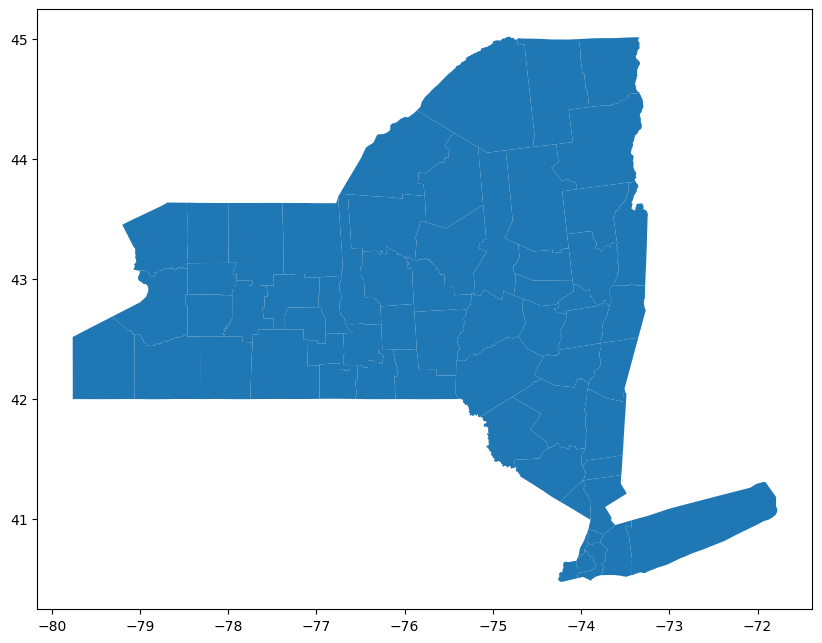

In [33]:
ny_counties = counties[counties["statefp"] == '36']

# Plot the gdf polygons
fig, ax = plt.subplots(figsize = (10, 10))
ny_counties.plot(ax = ax)


plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.


In [34]:
print(ny_counties['name'].unique())

['Steuben' 'Saratoga' 'Allegany' 'Oswego' 'Ulster' 'St. Lawrence'
 'Schuyler' 'Essex' 'Suffolk' 'Hamilton' 'Dutchess' 'Otsego' 'Tompkins'
 'Albany' 'Cayuga' 'Greene' 'Herkimer' 'Warren' 'Jefferson' 'Clinton'
 'Nassau' 'Madison' 'Washington' 'Westchester' 'Lewis' 'Ontario'
 'Cortland' 'Richmond' 'Erie' 'Putnam' 'Montgomery' 'Sullivan' 'Orleans'
 'Oneida' 'Cattaraugus' 'Yates' 'Tioga' 'Monroe' 'Schoharie' 'Broome'
 'Rensselaer' 'Seneca' 'Queens' 'Genesee' 'Wayne' 'Niagara' 'Kings'
 'Chemung' 'Wyoming' 'New York' 'Columbia' 'Chautauqua' 'Franklin'
 'Onondaga' 'Chenango' 'Fulton' 'Rockland' 'Livingston' 'Delaware'
 'Orange' 'Schenectady' 'Bronx']


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.

In [35]:
print(spills_per_county['county'].unique())

['Albany' 'Allegany' 'Bronx' 'Broome' 'Cattaraugus' 'Cayuga' 'Chautauqua'
 'Chemung' 'Chenango' 'Clinton' 'Columbia' 'Cortland' 'Delaware'
 'Dutchess' 'Erie' 'Essex' 'Franklin' 'Fulton' 'Genesee' 'Greene'
 'Hamilton' 'Herkimer' 'Jefferson' 'Kings' 'Lewis' 'Livingston' 'Madison'
 'Monroe' 'Montgomery' 'Nassau' 'New Jersey - Region 2' 'New York'
 'Niagara' 'Oneida' 'Onondaga' 'Ontario' 'Orange' 'Orleans' 'Oswego'
 'Otsego' 'Putnam' 'Queens' 'Rensselaer' 'Richmond' 'Rockland' 'Saratoga'
 'Schenectady' 'Schoharie' 'Schuyler' 'Seneca' 'St Lawrence' 'Steuben'
 'Suffolk' 'Sullivan' 'Tioga' 'Tompkins' 'Tuscarora Indian Reservation'
 'Ulster' 'Warren' 'Washington' 'Wayne' 'Westchester' 'Wyoming' 'Yates']


<!-- END QUESTION -->



c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 


In [38]:
diff_names_spills = list(np.setdiff1d(spills_per_county['county'].unique(), ny_counties['name'].unique()))
diff_names_spills


['New Jersey - Region 2', 'St Lawrence', 'Tuscarora Indian Reservation']

In [39]:
grader.check("7Ac")

7Ac results: All test cases passed!

d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [41]:
diff_names_ny = list(np.setdiff1d(ny_counties['name'].unique(), spills_per_county['county'].unique()))
diff_names_ny

['St. Lawrence']

In [42]:
grader.check("7Ad")

7Ad results: All test cases passed!

e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [53]:
# e. 
# Extract the n_spills value for the Tuscarora Indian Reservation from the spills_per_county df
spills_count = spills_per_county[spills_per_county['county'] == 'Tuscarora Indian Reservation']['n_spills'].values[0]
print(f'Number of spills in the Tuscarora Indian Reservation: {spills_count}')

Number of spills in the Tuscarora Indian Reservation: 1


### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and Verify the update was successful.


In [55]:
# Replace 'St Lawrence' with 'St. Lawrence'
spills_per_county['county'] = spills_per_county['county'].replace('St Lawrence', 'St. Lawrence')

# Print 

### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 


b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.



From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation) and date of access



b. Write a description of how the map was created, including key takeaways. If you need to do additional data analysis to include relevant information from the data, you may include additional cells here.

*Your answer here.*

## Complete workflow

**STILL WORKING ON THIS**

Collect all the relevant code into a **new notebook** titled `hwk3-task1-spills-COMPLETE-YOURLASTNAME.ipynb`. This notebook should have two sections:the a single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the assignment rubric.



**From last HW:**

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The only ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the assignment rubric.

##### Run the cell below to run all autograder tests. 

In [ ]:
grader.check_all()